In [ ]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
from google.colab import drive
from scipy.interpolate import interp1d
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#NORMAL RAILWAY
file_paths_std = [
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.4_std_hrz_1.0.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.4_std_hrz_1.2.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.4_std_hrz_1.5.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.8_std_hrz_1.0.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.8_std_hrz_1.2.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.8_std_hrz_1.5.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_2.3_std_hrz_1.0.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_2.3_std_hrz_1.2.mat',
    '/content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_2.3_std_hrz_1.5.mat'
]

file_data = []
vrt_hrz_data = []
df = []

# Read data from all files
for i, file_path in enumerate(file_paths_std):
    print(f"Reading File: {file_path}")
    data = sio.loadmat(file_path)
    file_data.append(data)
    vrt_hrz_data.append(data['ad2Irregularities'])
    df.append(pd.DataFrame(data['ad2Irregularities'], columns=['x', 'ALE', 'NLE', 'ALD', 'NLD']))
    df[i] = df[i].head(540000)

Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.4_std_hrz_1.0.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.4_std_hrz_1.2.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.4_std_hrz_1.5.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.8_std_hrz_1.0.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.8_std_hrz_1.2.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_1.8_std_hrz_1.5.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_2.3_std_hrz_1.0.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_2.3_std_hrz_1.2.mat
Reading File: /content/drive/MyDrive/Tese_Dados/Irregularities/Normal/Irregularities_std_vrt_2.3

In [ ]:
railway_length_cm = 540000  # centimeters (5400 meters)
window_size_cm = 20001  # centimeters (200 meters)
step_size_cm = 100  # centimeters (1 meter)
accel_frequency = 5000  # Hz (5 kHz)

# Calculate the number of iterations based on the step size
num_iterations = int((railway_length_cm - window_size_cm) / step_size_cm) + 1

# Initialize a list to store the standard deviations for each DataFrame
std_deviations_list = []

# Iterate over each DataFrame
for df_item in df:
    # Convert the DataFrame to a NumPy array
    data = df_item.values

    # Initialize an array to store the standard deviation for each window
    std_deviations = np.zeros((num_iterations, 4))

    # Iterate over each window
    for i in range(num_iterations):
        start_idx = i * step_size_cm
        end_idx = start_idx + window_size_cm

        # Extract the data for the current window
        window_data = data[start_idx:end_idx, 1:]

        # Calculate the standard deviation for each column
        std_deviations[i] = np.std(window_data, axis=0)

    # Add the standard deviations for the current DataFrame to the list
    std_deviations_list.append(std_deviations)

In [ ]:
file_paths_axle_box_accelerations = [
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15801DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15802DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15803DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15804DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15805DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15806DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15807DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15808DSCD5400nfR1080.mat',
    '/content/drive/MyDrive/Tese_Dados/Damaged_scenarios_noisy_filtered_axle_box_accelerations/ABA15809DSCD5400nfR1080.mat'
]

# Create a list to store the DataFrames
df_list = []

# Loop through the file paths
for file_path in file_paths_axle_box_accelerations:
    for i in range(8):
        # Load the .mat file
        data = sio.loadmat(file_path)

        # Extract the variable data
        variable_name = next(key for key in data.keys() if not key.startswith('__'))
        variable_data = data[variable_name]

        # Access the actual array data within the (1, 1) shape
        array_data = variable_data[0, 0][i]

        # Convert the reshaped array to a DataFrame
        df = pd.DataFrame(array_data)

        # Append the DataFrame to the df_list
        df_list.append(df)

concatenated_list = []

for df in df_list:
    concatenated_df = pd.DataFrame()
    for col in df.columns:
        column = df[col]
        concatenated_df = pd.concat([concatenated_df, column], ignore_index=True)
    concatenated_list.append(concatenated_df)

# Initialize an empty list to store the resulting dataframes
result = []

column_names_accelerations = ['S4_y1', 'S4_z1', 'S1_y1', 'S1_z1', 'S2_y1', 'S2_z1', 'S3_y1', 'S3_z1']


# Loop through every 8 dataframes
for i in range(0, len(concatenated_list), 8):
    # Slice the 8 dataframes
    subset = concatenated_list[i:i+8]

    # Concatenate the dataframes horizontally (axis=1)
    concatenated_df = pd.concat(subset, axis=1)

    concatenated_df.columns = column_names_accelerations

    # Append the concatenated dataframe to the result list
    result.append(concatenated_df)

# Result will contain the desired 9 dataframes with a shape of [1215000 rows x 8 columns]

# Define irregularity timestamp for the center of each window
timestamps_irregularity = np.linspace(window_size_cm / 2, railway_length_cm - window_size_cm / 2, num_iterations) / 100  # convert to meters

# Define acceleration timestamp
timestamps_acceleration = np.linspace(0, railway_length_cm / 100, 1215000)  # convert to meters

final_datasets = []

for i in range(len(result)):
    std_deviations = std_deviations_list[i]

    # Interpolate the std_deviations to match the acceleration data frequency
    f_interp = interp1d(timestamps_irregularity, std_deviations, axis=0, fill_value="extrapolate")
    std_deviations_interp = f_interp(timestamps_acceleration)

    # Create a dataframe for the interpolated std_deviations
    df_std_deviations_interp = pd.DataFrame(std_deviations_interp, columns=['ALE', 'NLE', 'ALD', 'NLD'])

    # Get the actual DataFrame for the current acceleration scenario from result[]
    acceleration_scenario = result[i]

    # Concatenate the interpolated std_deviations with the accelerations
    df_combined = pd.concat([df_std_deviations_interp, acceleration_scenario], axis=1)

    final_datasets.append(df_combined)

In [ ]:
print(final_datasets[8])

              ALE       NLE       ALD       NLD     S4_y1     S4_z1     S1_y1  \
0        0.001292 -0.003145  0.001768  0.002420 -0.479484  0.090139  0.303940   
1        0.001292 -0.003145  0.001768  0.002420 -0.236182 -0.327961  0.036171   
2        0.001292 -0.003145  0.001768  0.002420 -0.355167 -0.833137 -0.215941   
3        0.001292 -0.003144  0.001768  0.002420 -0.526721 -1.294026 -0.300193   
4        0.001292 -0.003144  0.001768  0.002420 -0.345402 -1.348928 -0.191365   
...           ...       ...       ...       ...       ...       ...       ...   
1214995  0.001430  0.001477  0.001436  0.002097 -0.474202  0.253154 -0.070253   
1214996  0.001430  0.001477  0.001436  0.002097 -0.500672  0.045463  0.109074   
1214997  0.001430  0.001477  0.001436  0.002097 -0.343128 -0.048701 -0.069388   
1214998  0.001430  0.001477  0.001436  0.002097 -0.338333  0.010708 -0.167085   
1214999  0.001430  0.001477  0.001436  0.002097 -0.629295  0.075474  0.113187   

            S1_z1     S2_y1

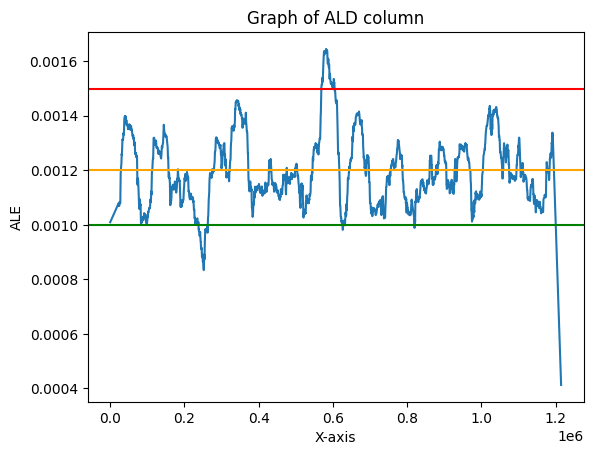

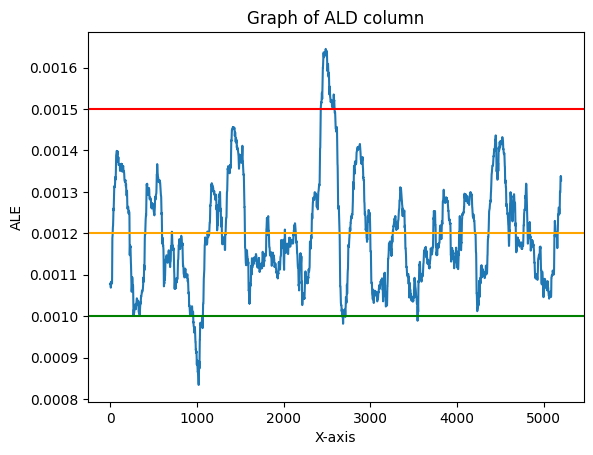

In [ ]:
# Retrieve the 'ALE' column from final_datasets[0]
ale_column = final_datasets[1]['ALE']
std_deviations = std_deviations_list[1]

# Create x-axis values (assuming the index of the dataframe represents the x-values)
x_values = final_datasets[0].index
plt.figure()
# Create the line graph
plt.plot(x_values, ale_column)
plt.axhline(y=0.001, color='green', linestyle='-', label='Alert Limit - 120 < V < 160')
plt.axhline(y=0.0012, color='orange', linestyle='-', label='Alert Limit - 80 < V < 120')
plt.axhline(y=0.0015, color='red', linestyle='-', label='Alert Limit - v < 80')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('ALE')
plt.title('Graph of ALD column')

# Display the graph
plt.show()

# Create x-axis values (assuming the index of the dataframe represents the x-values)
#x_values = final_datasets[1].index
plt.figure()
# Create the line graph
plt.plot(std_deviations[:,0])
plt.axhline(y=0.001, color='green', linestyle='-', label='Alert Limit - 120 < V < 160')
plt.axhline(y=0.0012, color='orange', linestyle='-', label='Alert Limit - 80 < V < 120')
plt.axhline(y=0.0015, color='red', linestyle='-', label='Alert Limit - v < 80')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('ALE')
plt.title('Graph of ALD column')

# Display the graph
plt.show()


In [ ]:
def assign_label(ale, ald, nle, nld):
        if (ale > 1.5e-3 or ald > 1.5e-3 or nle > 2.3e-3 or nld > 2.3e-3):
            return 1  # Fault
        else:
            return 0  # No Fault

In [ ]:
def assign_label(ale, ald, nle, nld):
    if (ale > 1.5e-3 or ald > 1.5e-3 or nle > 2.3e-3 or nld > 2.3e-3):
        return 1  # Fault
    else:
        return 0  # No Fault

for df in final_datasets:
    df['Label'] = df.apply(lambda row: assign_label(row['ALE'], row['ALD'], row['NLE'], row['NLD']), axis=1)

In [ ]:
print(final_datasets[0])

              ALE       NLE       ALD       NLD     S4_y1     S4_z1     S1_y1  \
0        0.001001  0.001252  0.000791  0.001581 -0.040123  0.453590 -0.174633   
1        0.001001  0.001252  0.000791  0.001581 -0.194813  0.489088 -0.250977   
2        0.001001  0.001252  0.000791  0.001581 -0.223646  0.294195 -0.272178   
3        0.001001  0.001252  0.000791  0.001581 -0.154993  0.085980 -0.233222   
4        0.001001  0.001252  0.000791  0.001581 -0.056824  0.186800 -0.150324   
...           ...       ...       ...       ...       ...       ...       ...   
1214995  0.000869  0.002821  0.001209  0.001558 -0.484764 -0.361260 -0.007089   
1214996  0.000869  0.002821  0.001209  0.001558 -0.487082 -0.070804 -0.110631   
1214997  0.000869  0.002821  0.001209  0.001558 -0.211321  0.122795 -0.255449   
1214998  0.000869  0.002821  0.001209  0.001558 -0.059216  0.120368 -0.217580   
1214999  0.000869  0.002821  0.001209  0.001558 -0.226884  0.048914  0.005256   

            S1_z1     S2_y1

In [ ]:
for df in final_datasets:
    label_counts = df['Label'].value_counts()
    total_rows = len(df)

    if 1 in label_counts:
        label_1_percentage = (label_counts[1] / total_rows) * 100
    else:
        label_1_percentage = 0.0

    if 0 in label_counts:
        label_0_percentage = (label_counts[0] / total_rows) * 100
    else:
        label_0_percentage = 0.0

    print("----------------")
    print(f"Percentage of Label 1: {label_1_percentage}%")
    print(f"Percentage of Label 0: {label_0_percentage}%")
    print()

----------------
Percentage of Label 1: 0.8615637860082305%
Percentage of Label 0: 99.13843621399177%

----------------
Percentage of Label 1: 6.622633744855968%
Percentage of Label 0: 93.37736625514404%

----------------
Percentage of Label 1: 68.68090534979424%
Percentage of Label 0: 31.31909465020576%

----------------
Percentage of Label 1: 1.2025514403292181%
Percentage of Label 0: 98.79744855967078%

----------------
Percentage of Label 1: 8.552427983539095%
Percentage of Label 0: 91.44757201646091%

----------------
Percentage of Label 1: 69.23399176954732%
Percentage of Label 0: 30.766008230452673%

----------------
Percentage of Label 1: 68.09884773662552%
Percentage of Label 0: 31.901152263374488%

----------------
Percentage of Label 1: 68.52724279835391%
Percentage of Label 0: 31.47275720164609%

----------------
Percentage of Label 1: 85.04057613168725%
Percentage of Label 0: 14.959423868312758%



In [ ]:
directory_path = '/content/drive/MyDrive/Tese_Dados/Final_Data'

for i, df in enumerate(final_datasets):
    file_name = f"final_data_damaged_scenario{i+1}.mat"  # Create a unique file name for each DataFrame
    file_path = f"{directory_path}/{file_name}"
    data = {'data': df.values}  # Create a dictionary with the DataFrame values
    sio.savemat(file_path, data)  # Save the dictionary to a .mat file